## Observations and Insights 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
from scipy.stats import linregress 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata , study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
mouse_count = len(merged_df['Mouse ID'].unique())
print(f'The current mouse count is: {mouse_count}') 

The current mouse count is: 249


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]) == True, "Mouse ID"].unique()



array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_dup_df = merged_df[merged_df['Mouse ID'] == 'g989']
merged_dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_newindex_df = merged_df.set_index('Mouse ID')
merged_drop_df = (merged_newindex_df.drop('g989'))
merged_drop_df = merged_drop_df.reset_index()
merged_drop_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
merged_drop_count = len(merged_drop_df['Mouse ID'].unique())
print(f'The new mice count without duplicate mice data is: {merged_drop_count}')

The new mice count without duplicate mice data is: 248


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merged_dropped_groupby_df = merged_drop_df.groupby('Drug Regimen')
tumor_mean = merged_dropped_groupby_df['Tumor Volume (mm3)'].mean()
tumor_median = merged_dropped_groupby_df['Tumor Volume (mm3)'].median()
tumor_var = merged_dropped_groupby_df['Tumor Volume (mm3)'].var()
tumor_std = merged_dropped_groupby_df['Tumor Volume (mm3)'].std()
tumor_sem = merged_dropped_groupby_df['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
sum_stats_df = pd.DataFrame({'Tumor Vol. Average (mm3)': round(tumor_mean,2),
                          'Tumor Vol. Median (mm3)': round(tumor_median,2),
                          'Tumor Vol. Variance': round(tumor_var,2),
                          'Tumor Vol. Standard Deviation': round(tumor_std),
                          'Vol. Mean Standard Error': round(tumor_sem,3)})
sum_stats_df


,Tumor Vol. Average (mm3),Tumor Vol. Median (mm3),Tumor Vol. Variance,Tumor Vol. Standard Deviation,Vol. Mean Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,5.0,0.329
Ceftamin,52.59,51.78,39.29,6.0,0.470
Infubinol,52.88,51.82,43.13,7.0,0.492
Ketapril,55.24,53.70,68.55,8.0,0.604
Naftisol,54.33,52.51,66.17,8.0,0.596
Placebo,54.03,52.29,61.17,8.0,0.581
Propriva,52.32,50.45,43.85,7.0,0.544
Ramicane,40.22,40.67,23.49,5.0,0.321
Stelasyn,54.23,52.43,59.45,8.0,0.573


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_reg_mouseid = merged_drop_df[['Drug Regimen','Mouse ID']]
drug_reg_mouseid
# This method produces everything in a single groupby function


,Drug Regimen,Mouse ID
0,Ramicane,k403
1,Ramicane,k403
2,Ramicane,k403
3,Ramicane,k403
4,Ramicane,k403
...,...,...
1875,Naftisol,z969
1876,Naftisol,z969
1877,Naftisol,z969
1878,Naftisol,z969


## Bar and Pie Charts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

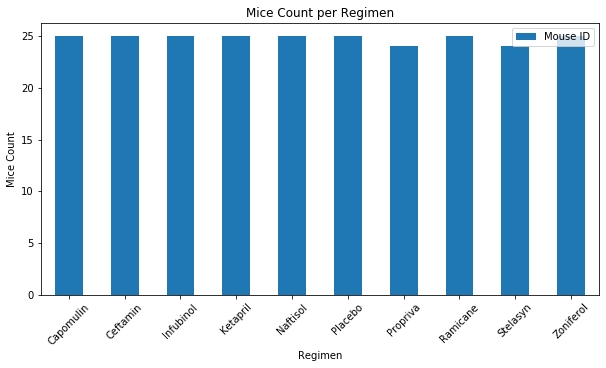

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
group_drugreg = merged_drop_df.groupby('Drug Regimen')
grouped_drug_count = group_drugreg['Mouse ID'].nunique()
# Create a DataFrame
bar_df = pd.DataFrame(grouped_drug_count)
# Plot with Panda
bar_df.plot(kind='bar', figsize=(10,5))
# Label graph
plt.title("Mice Count per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Mice Count")
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

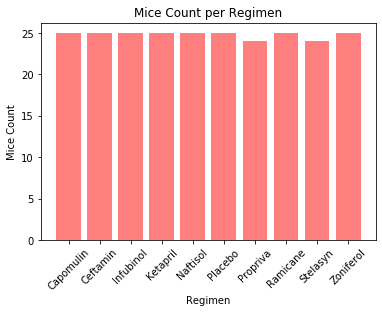

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
y_axis = grouped_drug_count
x_axis = grouped_drug_count.index

plt.bar(x=x_axis,height=y_axis, color='r', alpha=0.5, align="center")
plt.title("Mice Count per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Mice Count")
plt.xticks(rotation=45)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9214660C8>],
      dtype=object)

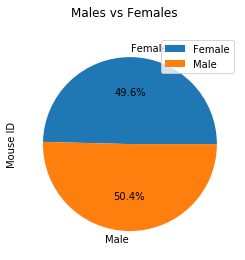

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
idgroup_df = merged_drop_df.groupby('Sex')
gender_series = idgroup_df['Mouse ID'].nunique()
# Create dataframe
pie_df = pd.DataFrame(gender_series)
# Plot
pie_df.plot(kind='pie', subplots=True, autopct='%1.1f%%', title='Males vs Females')

Text(0.5, 1.0, 'Males vs Females')

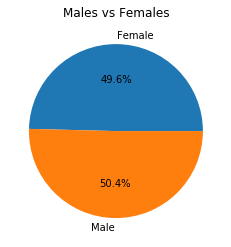

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_df['Mouse ID'], labels = ['Female', 'Male'], autopct='%1.1f%%')
plt.title('Males vs Females')

## Quartiles, Outliers and Boxplots

In [20]:
merged_drop_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouseID_group = merged_drop_df.groupby('Mouse ID')
max_df = pd.DataFrame(mouseID_group['Timepoint'].max())
maxvol_df = pd.merge(merged_drop_df, max_df, on=['Mouse ID','Timepoint'], how='right')
maxvol_major_four_df = maxvol_df.loc[(maxvol_df['Drug Regimen'] == 'Capomulin') | (maxvol_df['Drug Regimen'] == 'Ramicane') | (maxvol_df['Drug Regimen'] == 'Infubinol') | (maxvol_df['Drug Regimen'] == 'Ceftamin')]

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9214147c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c921414e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c921409fc8>,
 'medians': [<matplotlib.lines.Line2D at 0x1c921419dc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c921419ec8>,
 'means': []}

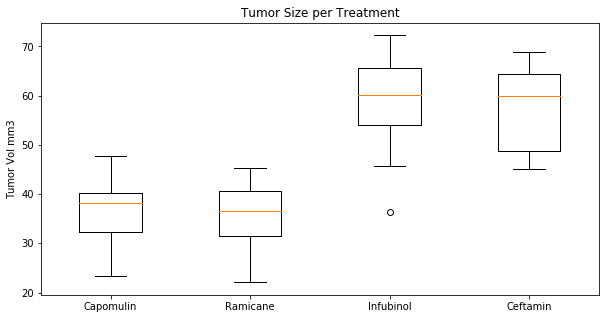

In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for i in treatments:
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    max_vol_data_df = maxvol_major_four_df.loc[maxvol_major_four_df['Drug Regimen'] == i]
    max_vol_data_df = max_vol_data_df['Tumor Volume (mm3)']
     
#     quantiles = max_vol_data.quantile([0.25,.5,.75])
    # Determine quartiles
#     Q1 = quantiles[0.25]
#     Q3 = quantiles[0.75]
#     iqr = Q3 - Q1
    # Determine outliers using upper and lower bounds
#     lower_bound = Q1 - (1.5*iqr)
#     upper_bound = Q3 + (1.5*iqr)
#     outliers = max_vol_data.loc[(max_vol_data < lower_bound) | (max_vol_data > upper_bound)]
    # append
    tumor_vol_data.append(max_vol_data_df)
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10,5))
plt.title('Tumor Size per Treatment')
plt.ylabel('Tumor Vol mm3')
plt.boxplot(tumor_vol_data, labels=treatments)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Vol (mm3)')

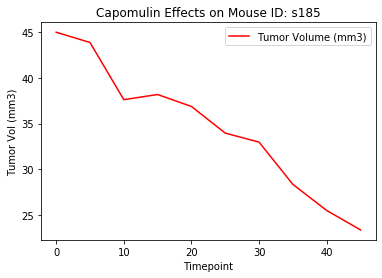

In [54]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_df = merged_drop_df.loc[merged_drop_df['Mouse ID'] == 's185']
s185_df = s185_df[['Timepoint', 'Tumor Volume (mm3)']].set_index('Timepoint')
s185_df.plot(color = 'red')
plt.title('Capomulin Effects on Mouse ID: s185')
plt.ylabel('Tumor Vol (mm3)')

Text(0, 0.5, 'Weight (g)')

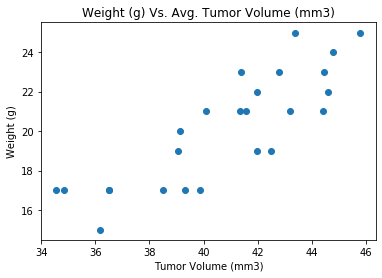

In [68]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = merged_drop_df.loc[merged_drop_df['Drug Regimen'] == 'Capomulin']
capomulin_df.head(20)
capomulin_group_df = capomulin_df.groupby('Mouse ID')
capomulin_group_df = capomulin_group_df[['Weight (g)','Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_group_df['Tumor Volume (mm3)'], capomulin_group_df['Weight (g)'])
plt.title('Weight (g) Vs. Avg. Tumor Volume (mm3)')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')

## Correlation and Regression

The r-squared is: 0.709


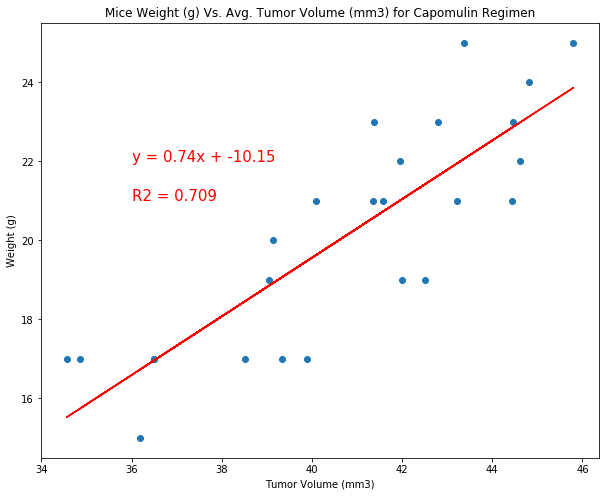

In [94]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_group_df['Tumor Volume (mm3)']
y_values = capomulin_group_df['Weight (g)']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.figure(figsize=(10,8))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (36,22), fontsize=15, color="red")
plt.annotate(f'R2 = {round(rvalue**2,3)}', (36,21), fontsize=15, color="red")
plt.title('Mice Weight (g) Vs. Avg. Tumor Volume (mm3) for Capomulin Regimen')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
print(f"The r-squared is: {round(rvalue**2,3)}")